In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsAA
%matplotlib inline

In [114]:
DF=pd.read_csv('merged.csv')

C:\Users\yashg\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,2,3,4,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [115]:
DF.head(10)

,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,direction,sourceTCPFlagsDescription,destinationTCPFlagsDescription,source,protocolName,sourcePort,destination,destinationPort,startDateTime,stopDateTime,Tag
0,BitTorrent,391223,4114484,7322,5650,L2R,"F,P,A","F,P,A",192.168.2.107,tcp_ip,1989,80.246.149.72,6880,2010-06-14T21:54:57,2010-06-15T01:43:38,Normal
1,Unknown_UDP,236345,5324121,4282,3378,L2R,NaN,NaN,192.168.2.107,udp_ip,58040,96.238.239.35,24457,2010-06-14T21:54:58,2010-06-15T00:52:01,Normal
2,Unknown_UDP,410420,11797592,9416,5791,L2R,NaN,NaN,192.168.2.107,udp_ip,58040,220.126.251.32,27295,2010-06-14T21:55:15,2010-06-15T01:54:44,Normal
3,BitTorrent,127588,2949293,2249,1853,L2R,"P,A","F,R,P,A",192.168.2.107,tcp_ip,2048,92.126.24.44,44817,2010-06-14T21:56:24,2010-06-15T00:53:07,Normal
4,Unknown_UDP,389781,11382564,8837,5531,L2R,NaN,NaN,192.168.2.107,udp_ip,58040,67.173.154.16,53341,2010-06-14T21:57:08,2010-06-15T01:54:44,Normal
5,Unknown_UDP,777402,6842735,22301,11559,L2R,NaN,NaN,192.168.2.107,udp_ip,58040,189.71.30.62,30024,2010-06-14T22:01:06,2010-06-15T00:59:05,Normal
6,BitTorrent,257639,5446263,5463,3749,L2R,"R,P,A","P,A",192.168.2.107,tcp_ip,2090,95.133.100.164,35691,2010-06-14T22:01:10,2010-06-15T01:55:07,Normal
7,BitTorrent,281537,6628908,4770,4158,L2R,"P,A","F,R,P,A",192.168.2.107,tcp_ip,2110,201.229.226.19,57421,2010-06-14T22:02:25,2010-06-15T01:05:20,Normal
8,BitTorrent,655532,12542818,13145,9797,L2R,"R,P,A","P,A",192.168.2.107,tcp_ip,2109,84.75.188.175,55123,2010-06-14T22:02:25,2010-06-15T01:54:44,Normal
9,Unknown_TCP,462835,9128315,6706,6932,L2R,"R,P,A","P,A",192.168.2.107,tcp_ip,2114,77.41.70.224,27571,2010-06-14T22:02:33,2010-06-15T01:54:44,Normal


In [116]:
#Revelant  Features

Clustering=DF[['totalSourceBytes','totalDestinationBytes','totalDestinationPackets','totalSourcePackets','direction','protocolName','sourcePort','destinationPort']]

In [117]:
Clustering.head(3)

,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,direction,protocolName,sourcePort,destinationPort
0,391223,4114484,7322,5650,L2R,tcp_ip,1989,6880
1,236345,5324121,4282,3378,L2R,udp_ip,58040,24457
2,410420,11797592,9416,5791,L2R,udp_ip,58040,27295


In [118]:
#Revelant Numerical Features

Step_1=Clustering[['totalSourceBytes','totalDestinationBytes','totalDestinationPackets','totalSourcePackets','sourcePort','destinationPort']]

In [119]:
def Numeric(S):
    return pd.to_numeric(S,errors='coerce')

In [120]:
#Converting String to numeric

Step_1=Step_1.apply(Numeric)

In [121]:
#Categorical Features

Step_2=DF[['direction','protocolName']]

In [122]:
#Converting Categorical into Dummies 

Step_2=pd.get_dummies(Step_2)

In [123]:
#Combining All Features into One

Clusters=pd.concat([Step_1,Step_2],axis=1)

In [124]:
Clusters.dropna(inplace=True)

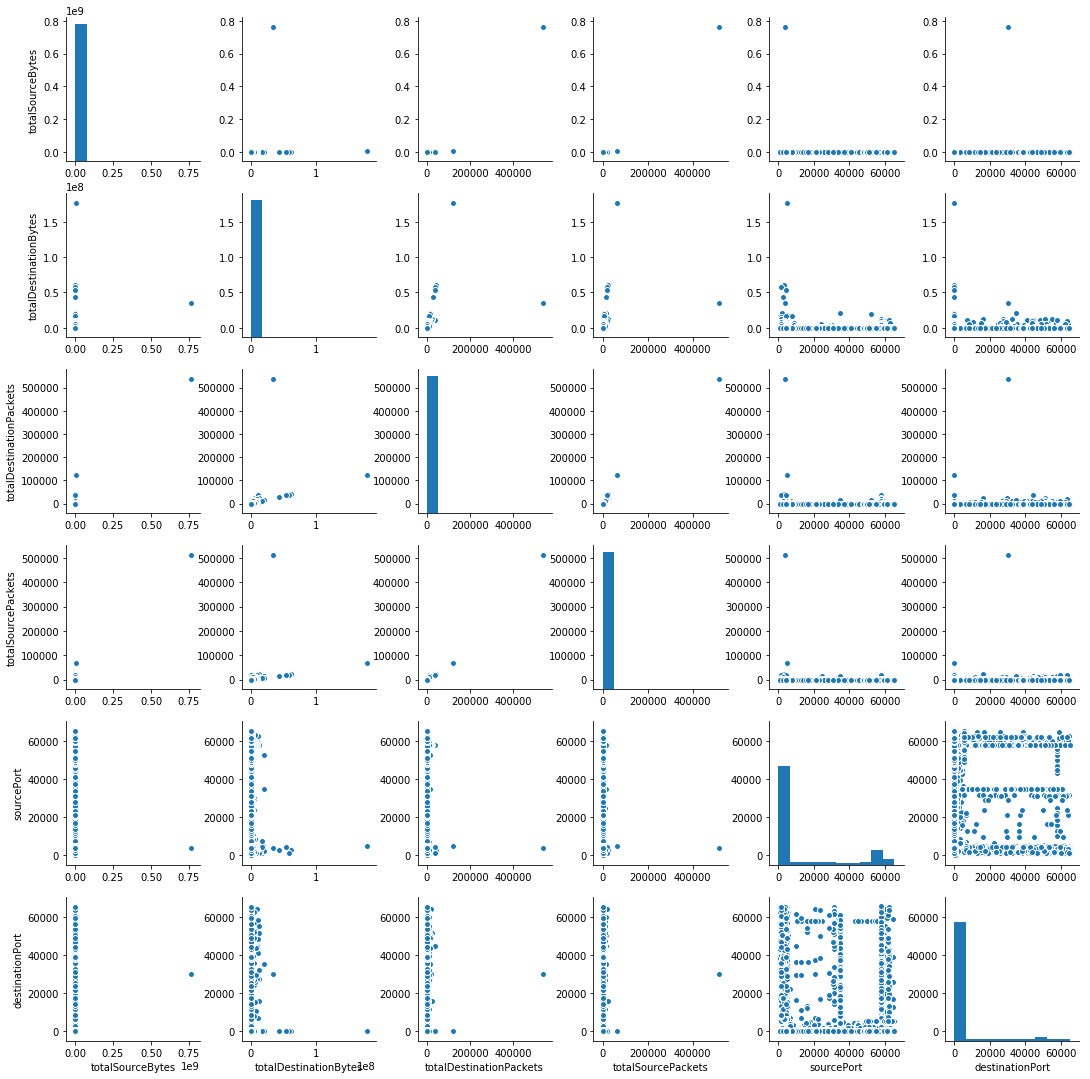

In [99]:
snsAA.pairplot(Clusters.iloc[:,:6])

In [125]:
#First Six Features of the Data set

Clusters.iloc[:,:6].head(3)

,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourcePort,destinationPort
0,391223.0,4114484.0,7322.0,5650.0,1989.0,6880.0
1,236345.0,5324121.0,4282.0,3378.0,58040.0,24457.0
2,410420.0,11797592.0,9416.0,5791.0,58040.0,27295.0


In [126]:
Final_1

array([[  5.12556639e-04,   2.32778252e-02,   1.36077431e-02, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  3.09644880e-04,   3.01213853e-02,   7.95798363e-03, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  5.37707383e-04,   6.67452551e-02,   1.74993867e-02, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       ..., 
       [  1.32324072e-07,   2.94757421e-06,   1.85847352e-06, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  4.19244585e-07,   4.29406684e-05,   9.29236762e-06, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   3.62082052e-07,   1.85847352e-06, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00]])

## Data Preprocessing

#### MinMax

**Transforms features by scaling each feature to a given range
This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one**

#### Standard Scalar

**Transforms Each Feature such that for each feature the mean is 0 and variance is 1**

#### Robust Scalar

**Transforms Each Feature similar to that of Standard Scalar but differs in respect that it uses Median**


#### Normalizer

**Transforms each feature such that each Feeature has a Total Eucledian length of 1 (Feature Vector)**

In [127]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
L=MinMaxScaler()

In [129]:
#Extracting out the Transformed Values
Final_1=L.fit_transform(Clusters)

In [130]:
from sklearn.preprocessing import Normalizer

In [131]:
Normalizer_1=Normalizer()

In [132]:
Normalizer_1=Normalizer_1.fit_transform(Clusters)

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
Standard_1=StandardScaler()

In [135]:
Standard_1=Standard_1.fit_transform(Clusters)

In [136]:
from sklearn.preprocessing import RobustScaler

In [137]:
Robust_1=RobustScaler()

In [138]:
Robust_1=Robust_1.fit_transform(Clusters)

# Clustering

### K Means : 

**K-means is often referred to as Lloyd’s algorithm. In basic terms, the algorithm has three steps. The first step chooses the initial centroids, with the most basic method being to choose k samples from the dataset X. After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its nearest centroid. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly**


#### MinMax

In [139]:
from sklearn.cluster import KMeans

In [140]:
Model=KMeans(n_clusters=2)

In [141]:
Model.fit(Final_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [142]:
Predictions=Model.predict(Final_1)

In [143]:
Final_2=pd.DataFrame(Model.labels_,columns=['Clusters'])

In [144]:
Final_2['Clusters'].value_counts()

1    447675
0    124023
Name: Clusters, dtype: int64

In [145]:
DF['Tag'].value_counts()

Normal    534238
Attack     37460
Tag            2
Name: Tag, dtype: int64

In [146]:
Model.labels_

array([1, 0, 0, ..., 0, 1, 1])

In [147]:
np.array(DF['Tag'])

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'Normal', 'Normal'], dtype=object)

# ---------------------------------- #

### Birch     

**Implements the Birch clustering algorithm**

**It is a memory-efficient, learning algorithm provided as an alternative to MiniBatchKMeans. It constructs a tree data structure with the cluster centroids being read off the leaf. These can be either the final cluster centroids or can be provided as input to another clustering algorithm such as Agglomerative Clusterin.**

**The Birch algorithm builds a dendrogram called clustering feature tree (CF tree) while scanning the data set. Each entry in the CF tree represents a cluster of objects and is characterized by a 3-tuple: (N, LS, SS), where N is the number of objects in the cluster**

#### MinMax

In [148]:
from sklearn.cluster import Birch

In [149]:
Model1=Birch(n_clusters=2)

In [150]:
pd.DataFrame(Final_1).head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000513,0.023278,0.013608,0.010975,0.030351,0.104982,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [151]:
Model1.fit(Final_1)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=2,
   threshold=0.5)

In [152]:
pd.Series(Model1.labels_).value_counts()

1    447656
0    124042
dtype: int64

In [153]:
DF['Tag'].value_counts()

Normal    534238
Attack     37460
Tag            2
Name: Tag, dtype: int64

## ------------------------------------- ##

### KMeans:Normalizer

In [154]:
Model.fit(Normalizer_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [155]:
pd.Series(Model.labels_).value_counts()

0    343629
1    228069
dtype: int64

In [156]:
DF['Tag'].value_counts()

Normal    534238
Attack     37460
Tag            2
Name: Tag, dtype: int64

###  Birch: Normalizer

In [175]:
Model1.fit(Normalizer_1)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=2,
   threshold=0.5)

In [176]:
pd.Series(Model1.labels_).value_counts()

1    533227
0     38471
dtype: int64

In [177]:
DF['Tag'].value_counts()

Normal    534238
Attack     37460
Tag            2
Name: Tag, dtype: int64

## ---------------------------------


### KMeans:Standard Scalar

In [160]:
Model.fit(Standard_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [161]:
pd.Series(Model.labels_).value_counts()

0    571697
1         1
dtype: int64

In [162]:
DF['Tag'].value_counts()

Normal    534238
Attack     37460
Tag            2
Name: Tag, dtype: int64

### Birch: Standard Scalar

In [163]:
Model1.fit(Standard_1)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=2,
   threshold=0.5)

In [164]:
pd.Series(Model1.labels_).value_counts()

0    571697
1         1
dtype: int64

In [165]:
DF['Tag'].value_counts()

Normal    534238
Attack     37460
Tag            2
Name: Tag, dtype: int64

### ------------------

### KMeans : Robust Scalar

In [166]:
Model.fit(Robust_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [167]:
pd.Series(Model.labels_).value_counts()

0    517041
1     54657
dtype: int64

In [168]:
DF['Tag'].value_counts()

Normal    534238
Attack     37460
Tag            2
Name: Tag, dtype: int64

## Conclusion

#### Out of all The Birch Clustering with Normalizer Preprocessing of the Dataset Produces the Best Clusters in accordance with the Dropped Tag Table

In [178]:
X=pd.Series(Model1.labels_).value_counts()
X

1    533227
0     38471
dtype: int64

In [179]:
Y=DF['Tag'].value_counts()
Y

Normal    534238
Attack     37460
Tag            2
Name: Tag, dtype: int64

In [180]:
Y=Y.drop('Tag')
Y.index=[1,0]

In [181]:
Y

1    534238
0     37460
Name: Tag, dtype: int64

# ---------------

In [182]:
print("Normal Packet Precision",(X[1]/Y[1]))

##BIRCH CLUSTERING WITH Normalizer Preprocessing

Normal Packet Precision 0.998107585009


In [183]:
print("Attack Packet Precision",(Y[0]/X[0]))

##ATACK CLUSTERING WITH Normalizer Preprocessing

Attack Packet Precision 0.973720464766


### ----------------

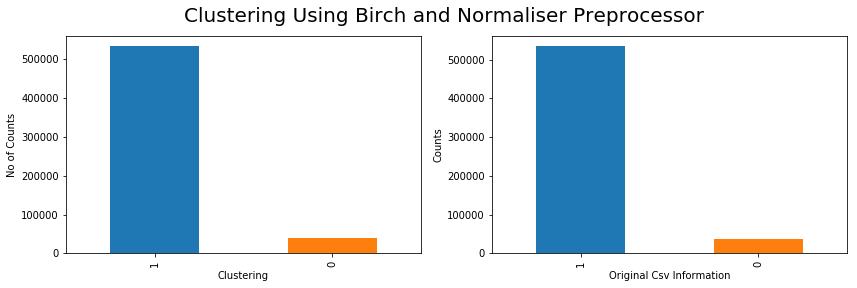

In [206]:
Original=plt.figure(figsize=(14,4))
Original.suptitle("Clustering Using Birch and Normaliser Preprocessor",fontsize=20)
Line1=plt.subplot(1,2,1)
Line1.set_ylabel('No of Counts')
Line1.set_xlabel("Clustering")
X.plot.bar()
Line2=plt.subplot(1,2,2)
Line2.set_xlabel('Original Csv Information')
Line2.set_ylabel("Counts")
Y.plot.bar()

### ---------------------------------------------------------------------------------

**The Following Project is Made by**
    * Yash Singhal(15103315)
    * Yash Varshney(15103314)
    * Ayushi Jain (15103294)
    * Shrey Batra (15103308)